###Loading package

In [13]:
!pip install apyori

In [14]:
import numpy as np, pandas as pd,matplotlib.pyplot as plt, seaborn as sns
from apyori import apriori

In [15]:
df=pd.read_csv('Retail.csv',encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Transactions from the Database,NaN,NaN,#Transactions in which\n the item is bought,Support,NaN
1,"1 : { Pencils, Markers, Highlighters, Papers}",NaN,Pencils,2,0.2,NaN
2,"2 : {Markers, Erasers}",NaN,Markers,6,0.6,NaN
3,"3 : {Stapler Pins, Papers, Erasers, Card Holde...",NaN,Highlighters,3,0.3,NaN
4,"4 : {Papers, Erasers, Cad Holders}",NaN,Papers,4,0.4,NaN


Above is a transition dataset. eg bill from dmart

In [16]:
df.shape

(18, 6)

In [17]:
df['Unnamed: 5'].value_counts()

Lift\nP(Erasers|Markers) / P( Erasers)    1
1.19                                      1
Name: Unnamed: 5, dtype: int64

As very few values are not NaN we can directly drop this column

In [18]:
df=df.drop(['Unnamed: 1','Unnamed: 5'],axis=1)
df.head()

,Unnamed: 0,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Transactions from the Database,NaN,#Transactions in which\n the item is bought,Support
1,"1 : { Pencils, Markers, Highlighters, Papers}",Pencils,2,0.2
2,"2 : {Markers, Erasers}",Markers,6,0.6
3,"3 : {Stapler Pins, Papers, Erasers, Card Holde...",Highlighters,3,0.3
4,"4 : {Papers, Erasers, Cad Holders}",Papers,4,0.4


In [19]:
df.shape

(18, 4)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11 non-null     object
 1   Unnamed: 2  13 non-null     object
 2   Unnamed: 3  12 non-null     object
 3   Unnamed: 4  14 non-null     object
dtypes: object(4)
memory usage: 704.0+ bytes


###Association rules

It is dependant on below 3 factors:

Support - it is measure of how frequently a group of items is bought together. High support value indicates those items are more frequently bought together

Lift - it is to check if relation between the items in group is meaningful/valid to what extent or is it just random. If it is <= to 1, it means low association, if greater than 1 then means more association

Confidence - it is measure like a matrix that tells how frequently item B is purchased given that item A is bought. Similar to conditional probability

In [24]:
records=[]
for i in range(0,17):
    records.append([str(df.values[i,j])for j in range(0,4)])

records

[['Transactions from the Database',
  'nan',
  '#Transactions in which\n the item is bought',
  'Support'],
 ['1 : { Pencils, Markers, Highlighters, Papers}', 'Pencils', '2', '0.2'],
 ['2 : {Markers, Erasers}', 'Markers', '6', '0.6'],
 ['3 : {Stapler Pins, Papers, Erasers, Card Holders, Highlighters}',
  'Highlighters',
  '3',
  '0.3'],
 ['4 : {Papers, Erasers, Cad Holders}', 'Papers', '4', '0.4'],
 ['5 : {Markers, Post-it, Erasers}', 'Erasers', '7', '0.7'],
 ['6 : {Envelop}', 'Stapler Pins', '3', '0.3'],
 ['7 : {Markers, Erasers}', 'Card Holders', '2', '0.2'],
 ['8 : {Pencils, Markers, StaplerPins, Post-it, Highlighter, Papers, Erasers}',
  'Post-it',
  '3',
  '0.3'],
 ['9 : {StaplerPins, Post-it, Markers, Erasers}', 'Envelop', '2', '0.2'],
 ['10 : {Envelop}', 'nan', 'nan', 'nan'],
 ['nan',
  'Construct item-sets with items that satisfy minimum support',
  '#Transactions in which\n the item is bought',
  'Support\nP(MarkersÇErasers)'],
 ['nan', 'Markers,Erasers', '5', '0.5'],
 ['nan',

In [26]:
records[1]

['1 : { Pencils, Markers, Highlighters, Papers}', 'Pencils', '2', '0.2']

###Making Association Rule

In [32]:
association_rules=apriori(records,min_support=0.05,min_confidence=0.2,min_lift=3,min_length=2)

In [33]:
association_result=list(association_rules)
len(association_result)

121

In [34]:
association_result[2]

RelationRecord(items=frozenset({'#Transactions in which\n the item is bought', 'Support\nP(MarkersÇErasers)'}), support=0.058823529411764705, ordered_statistics=[OrderedStatistic(items_base=frozenset({'#Transactions in which\n the item is bought'}), items_add=frozenset({'Support\nP(MarkersÇErasers)'}), confidence=0.5, lift=8.5), OrderedStatistic(items_base=frozenset({'Support\nP(MarkersÇErasers)'}), items_add=frozenset({'#Transactions in which\n the item is bought'}), confidence=1.0, lift=8.5)])

###Visualize the association rules

In [40]:
def plot_association_rules(association_result):
    support=[]
    confidence=[]
    lift=[]

    for item in association_result:
        support.append(item.support)
        confidence.append(item.ordered_statistics[0].confidence)
        lift.append(item.ordered_statistics[0].lift)

    # support vs confidence
    plt.scatter(support,confidence,alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence')
    plt.show()

    # support vs lift
    plt.scatter(support,confidence,alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Lift')
    plt.title('Support vs Lift')
    plt.show()

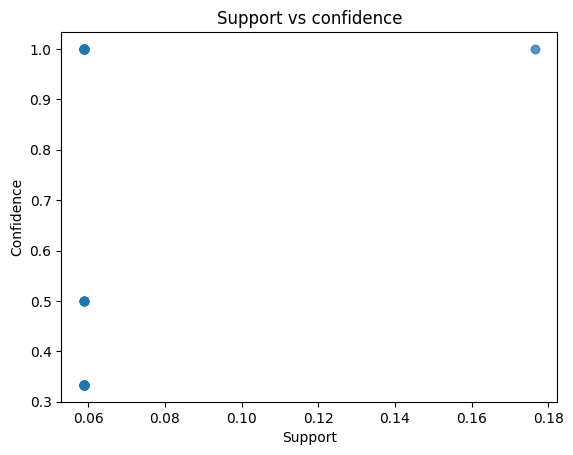

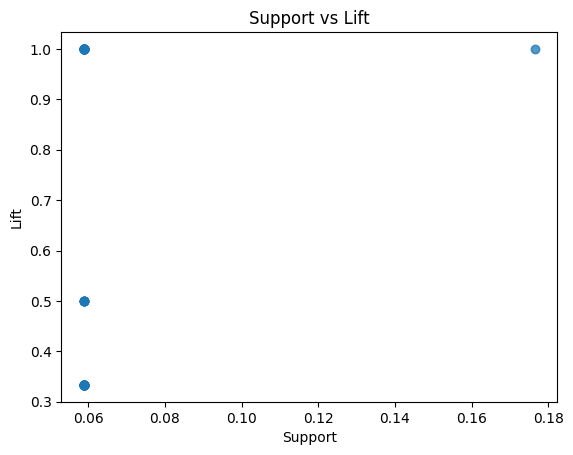

In [43]:
plot_association_rules(association_result)

###Rule interpretation

In [54]:
def interpret_rules(association_result):
    for item in association_result:
        items=[x for x in item.items]
        support=item.support
        confidence=item.ordered_statistics[0].confidence
        lift=item.ordered_statistics[0].lift

        print(f'Rule: {items[0]} -> {item[1]}')
        print(f'Support: {support}')
        print(f'Confidence: {confidence}')
        print(f'Lift: {lift}')
        print('-'*30)

In [56]:
interpret_rules(association_result)

Rule: #Transactions in which
 the item is bought -> 0.058823529411764705
Support: 0.058823529411764705
Confidence: 0.5
Lift: 8.5
------------------------------
Rule: Support -> 0.058823529411764705
Support: 0.058823529411764705
Confidence: 0.5
Lift: 8.5
------------------------------
Rule: #Transactions in which
 the item is bought -> 0.058823529411764705
Support: 0.058823529411764705
Confidence: 0.5
Lift: 8.5
------------------------------
Rule: #Transactions in which
 the item is bought -> 0.058823529411764705
Support: 0.058823529411764705
Confidence: 0.5
Lift: 8.5
------------------------------
Rule: 1 : { Pencils, Markers, Highlighters, Papers} -> 0.058823529411764705
Support: 0.058823529411764705
Confidence: 0.3333333333333333
Lift: 5.666666666666666
------------------------------
Rule: 2 -> 0.17647058823529413
Support: 0.17647058823529413
Confidence: 1.0
Lift: 5.666666666666666
------------------------------
Rule: 7 : {Markers, Erasers} -> 0.058823529411764705
Support: 0.05882352

In [ ]:
# # Rule Interpretation
# def interpret_rules(association_result):
#     for item in association_result:
#         # Interpret and print the rules, e.g., item names, support, confidence, and lift
#         items = [x for x in item.items]
#         support = item.support
#         confidence = item.ordered_statistics[0].confidence
#         lift = item.ordered_statistics[0].lift

#         print(f"Rule: {items[0]} -> {items[1]}")
#         print(f"Support: {support}")
#         print(f"Confidence: {confidence}")
#         print(f"Lift: {lift}")
#         print("-" * 30)


###Library which suggests which algorithm should be used for a particular dataset

In [57]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 104.1 MB/s e

In [59]:
from pycaret.classification import*

In [61]:
data=pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
setup(data,target='Churn')

,Description,Value
0,Session id,4019
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 42)"
6,Transformed train set shape,"(4930, 42)"
7,Transformed test set shape,"(2113, 42)"
8,Ordinal features,5
9,Numeric features,3


In [63]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7795,0.7881,0.5313,0.5948,0.5609,0.4144,0.4158,0.4430
lr,Logistic Regression,0.7454,0.8343,0.0681,0.7049,0.1239,0.0816,0.1616,1.7040
ridge,Ridge Classifier,0.7408,0.0000,0.0627,0.6031,0.1133,0.0676,0.1291,0.6890
et,Extra Trees Classifier,0.7361,0.6513,0.0076,0.6000,0.0151,0.0100,0.0509,0.6580
nb,Naive Bayes,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7080
dt,Decision Tree Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3940
rf,Random Forest Classifier,0.7347,0.7375,0.0000,0.0000,0.0000,0.0000,0.0000,0.7400
qda,Quadratic Discriminant Analysis,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6860
ada,Ada Boost Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4390
gbc,Gradient Boosting Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7070


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')